# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
import math
%matplotlib inline
import seaborn as sns
from collections import Counter, defaultdict

# Text Library
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))

# Splitting Data
from sklearn.model_selection import train_test_split

# Import libary for TFID Vectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import feature selection Libraries
from sklearn.feature_selection import SelectKBest, chi2, f_regression, mutual_info_classif

# Algorithm
from sklearn.naive_bayes import MultinomialNB

# Evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import time

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Run Functions and Import Data

In [2]:
# Import dataset
def import_data(folder, fileName):
    return pd.read_csv(folder+fileName+'.csv', index_col=0)
# Export dataset
def export_data(dataset, fileName):
    return dataset.to_csv(fileName+'.csv')

# Generate vectors from train and test dataset
def generate_vec(train_data, test_data):
    X_train = train_data['text'].values
    y_train = train_data['label'].values

    X_test = test_data['text'].values
    y_test = test_data['label'].values
    
    tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, lowercase = False, stop_words=None)

    # Fit transform to data train
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    tfidf_test = tfidf_vectorizer.transform(X_test)
    
    # return list of train and test vectors
    return [tfidf_train, tfidf_test]

In [3]:
# Folder location of Dataset
folder = 'C:/Users/ASUS/Documents/Learn Data Science/train_test/'
ft_folder = 'C:/Users/ASUS/Documents/Learn Data Science/tfidf_features/'

# Import df_pre2
train_pre2 = import_data(folder, 'pre2/train_pre2')
test_pre2 = import_data(folder, 'pre2/test_pre2')

# Import feature dataset of pre1 dan pre2
fitur_pre1 = import_data(ft_folder, 'pre1/fitur_pre1')
fitur_pre2 = import_data(ft_folder, 'pre2/fitur_pre2')

-- Get each train and test values of every dataset

In [4]:
X_train_pre2 = train_pre2['text'].values
y_train_pre2 = train_pre2['label'].values

X_test_pre2 = test_pre2['text'].values
y_test_pre2 = test_pre2['label'].values

# Generate feature vector for each dataset
vec_data = generate_vec(train_pre2, test_pre2)

In [5]:
# Show train vectors of each dataset / how many features
print("Features length of train data:",vec_data[0].shape[1])

Features length of train data: 3376


<strong>-- Build feature extraction vectorizer -- </strong>

In [6]:
# Get feature train and test for df_pre2
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, lowercase = False, stop_words=None)

# Fit transform to data train
tfidf_train_pre2 = tfidf_vectorizer.fit_transform(X_train_pre2)
tfidf_test_pre2 = tfidf_vectorizer.transform(X_test_pre2)

<strong> -- Create feature matrix for train & test df_pre2 -- </strong> 

In [7]:
# Build a dataframe based on matrix train_pre2
train_pre2_mtx = pd.DataFrame(data=tfidf_train_pre2.toarray(),columns=tfidf_vectorizer.get_feature_names())

# Build a dataframe based on matrix test_pre2
test_pre2_mtx = pd.DataFrame(data=tfidf_test_pre2.toarray(),columns=tfidf_vectorizer.get_feature_names())

In [8]:
train_pre2_mtx.head(3)

,abandoned,abandonment,ability,able,abort,absent,absolute,absolutely,abuse,abused,...,youll,young,youre,youtube,yoyo,yukata,yum,zero,zipped,zoloft
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Classify without feature selection

In [9]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score  

In [10]:
mnb = MultinomialNB()
mnbTfidf = mnb.fit(tfidf_train_pre2, y_train_pre2) # training the model
predictTfidf = mnbTfidf.predict(tfidf_test_pre2)

print("Evaluation Metrics")
print("Akurasi df_pre2:", round(accuracy_score(y_test_pre2,predictTfidf)*100, 2))
print("Precision df_pre2:", round(precision_score(y_test_pre2, predictTfidf)*100, 2))
print("Recall df_pre2:", round(recall_score(y_test_pre2, predictTfidf)*100,2))
print("F1 Score df_pre2:", round(f1_score(y_test_pre2, predictTfidf)*100, 2))

Evaluation Metrics
Akurasi df_pre2: 82.23
Precision df_pre2: 75.18
Recall df_pre2: 100.0
F1 Score df_pre2: 85.83


# Feature Selection with Information Gain

<b>Find feature length variation from 100% to 10%</b>

In [11]:
format_jml_ft = ["{}%".format(x*10) for x in range(10,0,-1)]
# length variation for df_pre2
lenFitur_pre2 = sorted([round(x*0.1*tfidf_train_pre2.shape[1]) for x in range(1, 11)], reverse=True)
print(format_jml_ft)
print("Variasi jumlah fitur pre2:", lenFitur_pre2)

['100%', '90%', '80%', '70%', '60%', '50%', '40%', '30%', '20%', '10%']
Variasi jumlah fitur pre2: [3376, 3038, 2701, 2363, 2026, 1688, 1350, 1013, 675, 338]


--  Add train labels from each train dataset to the respective train matrix --

In [12]:
# Assign each train label dataset to each respective train matrix
train_pre2_mtx['label_value'] = y_train_pre2

-- Run Function --

In [13]:
# Function to fund entropy of target cols / label of dataset
def entropy(target_col):
    """
    Calculate the entropy of a dataset.
    The only parameter of this function is the target_col parameter which specifies the target column
    """
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

# Function to find Information Gain value of a feature/attribute
def InfoGain(data,split_attribute_name,target_name="class"):
    """
    Calculate the information gain of a dataset. This function takes three parameters:
    1. data = The dataset for whose feature the IG should be calculated
    2. split_attribute_name = the name of the feature for which the information gain should be calculated
    3. target_name = the name of the target feature. The default for this example is "class"
    """    
    #Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    
    ##Calculate the entropy of the dataset
    
    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    #Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i])\
                                                                  .dropna()[target_name]) for i in range(len(vals))])
    
    #Calculate the information gain
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

<strong>-- Find IG value of each feature dataset --</strong>

In [17]:
# # Find IG for each feature
# ig_pre2_arr, time_c_arr, clock_c_arr = [], [], []
# listFitur_pre2 = list(fitur_pre2.feature)

# # Iterate through each df_pre2 feature to find IG value
# # Starting time
# clock_start = time.clock()
# time_start = time.time()
# for i in range(len(listFitur_pre2)):
#     print('Fitur ke-',i)
#     clock_s = time.clock()
#     time_s = time.time()
#     ig_pre2_arr.append(InfoGain(train_pre2_mtx, listFitur_pre2[i], 'label_value'))
#     # Append individual time
#     clock_c_arr.append(time.clock() - clock_s)
#     time_c_arr.append(time.time() - time_s)

# tot_clock = time.clock() - clock_start
# tot_time = time.time() - time_start
# # Insert ig_value to dataframe
# fitur_pre2['ig_value'] = ig_pre2_arr

In [18]:
# # Computation time for each feature
# print(pd.Series(time_c_arr).describe())
# print("Total computation time for All information Gain:", str(round(sum(time_c_arr)/60, 2)) + " minutes")

<strong> Export feature dataframe that contains ig_value in it</strong>

In [19]:
# Export fitur_pre1 with ig_value
# export_data(fitur_pre2, 'fitur_pre2')

In [20]:
loc = 'C:/Users/ASUS/Documents/Learn Data Science/all_dataset/IG_features/'

fitur_pre2 = import_data(loc, 'fitur_pre2')

In [21]:
# Preview dataframe df_pre1 with ig_value
fitur_pre2.head(3)

,feature,tfidf,mi_value,df_dep,df_nonDep,cpd,ig_value
0,abandoned,0.0,0.001439,1,0,1.0,0.002076
1,abandonment,0.0,0.001439,1,0,1.0,0.002076
2,ability,0.0,0.001439,1,0,1.0,0.002076


<strong>-- Tuning parameter Information Gain --</strong>

In [22]:
# Sort each feature dataframe based on ig_value
fitur_pre2_sorted = fitur_pre2.sort_values(by='ig_value', ascending=False)
fitur_pre2_sorted = list(fitur_pre2_sorted.feature) # convert ig columns into list

In [23]:
fitur_pre2_sorted[:10]

['like', 'feel', 'get', 'im', 'happy', 'know', 'really', 'got', 'life', 'year']

-- Find accuracy for each subset feature selected by Information Gain --

In [24]:
# Accuracy for df_pre2
acc_ig_pre2, prec_ig_pre2, rec_ig_pre2, f1score_ig_pre2 = ([] for i in range (4))
clock_arr_ig, time_arr_ig = [], []

for i in range(len(lenFitur_pre2)):
    # Create subset feature based on top-n lenFitur
    subset_feature = fitur_pre2_sorted[:lenFitur_pre2[i]]
    
    # Create feature matrix for train and test
    features_train = scipy.sparse.csr_matrix(train_pre2_mtx[subset_feature].values)
    features_test = scipy.sparse.csr_matrix(test_pre2_mtx[subset_feature].values)
    
    time_s, clock_s = time.time(), time.clock()
    # Build models and fit to train vector
    mnb = MultinomialNB()
    mnbTfidf = mnb.fit(features_train, y_train_pre2) # training the model
    predictTfidf = mnbTfidf.predict(features_test)
    clock_arr_ig.append(time.clock() - clock_s)
    time_arr_ig.append(time.time() - time_s)
    
    # Append accuracy, precision, recall, f1score for each feature selection 
    acc_ig_pre2.append(accuracy_score(y_test_pre2,predictTfidf))
    prec_ig_pre2.append(precision_score(y_test_pre2, predictTfidf))
    rec_ig_pre2.append(recall_score(y_test_pre2, predictTfidf))
    f1score_ig_pre2.append(f1_score(y_test_pre2, predictTfidf))

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationW

-- Show list of accuracy from IG --

In [25]:
# Precision, Recall & f1_score of df_pre2
print("Format Jumlah fitur (%):", ["{}%".format(x*10) for x in range(10,0,-1)], "\n")
print("Accuracy of df_pre2 (%):", [(round(x*100,2)) for x in acc_ig_pre2])
print("Precision of df_pre2 (%):", [(round(x*100,2)) for x in prec_ig_pre2])
print("Recall of df_pre2 (%):", [(round(x*100,2)) for x in rec_ig_pre2])
print("F1 Score of df_pre2 (%):", [(round(x*100,2)) for x in f1score_ig_pre2])

Format Jumlah fitur (%): ['100%', '90%', '80%', '70%', '60%', '50%', '40%', '30%', '20%', '10%'] 

Accuracy of df_pre2 (%): [82.23, 81.22, 80.2, 79.7, 80.2, 85.28, 87.82, 86.8, 86.8, 87.31]
Precision of df_pre2 (%): [75.18, 74.13, 73.1, 72.6, 73.1, 78.52, 82.03, 82.26, 83.33, 84.03]
Recall of df_pre2 (%): [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 99.06, 96.23, 94.34, 94.34]
F1 Score of df_pre2 (%): [85.83, 85.14, 84.46, 84.13, 84.46, 87.97, 89.74, 88.7, 88.5, 88.89]


In [26]:
print("Maximum accuracy:", round(max(acc_ig_pre2)*100, 2), "dgn jumlah fitur:", \
      format_jml_ft[acc_ig_pre2.index(max(acc_ig_pre2))])

print("Maximum Precision:", round(max(prec_ig_pre2)*100, 2), "dgn jumlah fitur:", \
      format_jml_ft[prec_ig_pre2.index(max(prec_ig_pre2))])

print("Maximum Recall:", round(max(rec_ig_pre2)*100, 2), "dgn jumlah fitur:", \
      format_jml_ft[rec_ig_pre2.index(max(rec_ig_pre2))])

print("Maximum F1_Score :", round(max(f1score_ig_pre2)*100, 2), "dgn jumlah fitur:", \
      format_jml_ft[f1score_ig_pre2.index(max(f1score_ig_pre2))])

Maximum accuracy: 87.82 dgn jumlah fitur: 40%
Maximum Precision: 84.03 dgn jumlah fitur: 10%
Maximum Recall: 100.0 dgn jumlah fitur: 100%
Maximum F1_Score : 89.74 dgn jumlah fitur: 40%


# Feature Selection with CPD

-- Create dataframe that contains document frequency --

In [27]:
# Generate document frequency of each feature in train data
# Input: word, train dataframe
def find_df(feature, train_data):
    tok_train = train_data.text.apply(lambda x: str(x).split())
    df_arr = []
    for i in range(0, len(feature)):
        freq = 0
        for item in tok_train:
            # if feature exist in data
          if feature[i] in item:
            freq += 1
        df_arr.append(freq)
    return df_arr

# Find CPD Value of each feature
# Input: word, list of document frequency for dep and non-dep; Output: cpd value & computation time
def find_cpd_value(feature, arr_dep, arr_nonDep):
    clock_arr, time_arr, cpd = [], [], []
    for i in range (0, len(feature)):
        time_s = time.time()
        clock_s = time.clock()
        
        val = abs(arr_dep[i] - arr_nonDep[i])/(arr_dep[i] + arr_nonDep[i])
        time_arr.append(time.time() - time_s)
        clock_arr.append(time.clock() - clock_s)
        cpd.append(val)
    return [cpd, time_arr, clock_arr]

-- Find depression and non-depression document frequency of each feature dataset --

In [28]:
# Split depression and non-depression data from each train data
train_pre2_dep = train_pre2[train_pre2.label == 1]
train_pre2_nonDep = train_pre2[train_pre2.label == 0]

# Find depression and non-depression document frequency of each features from df_pre2
df_dep_pre2 = find_df(list(fitur_pre2.feature), train_pre2_dep)
df_nonDep_pre2 = find_df(list(fitur_pre2.feature), train_pre2_nonDep)

# Create new columns (document frequency based on labels in feature dataset)
fitur_pre2['df_dep'] = df_dep_pre2
fitur_pre2['df_nonDep'] = df_nonDep_pre2

In [29]:
fitur_pre2[['df_dep', 'df_nonDep']].head(4)

,df_dep,df_nonDep
0,1,0
1,1,0
2,1,0
3,7,9


-- Generate CPD value for each feature --

In [30]:
# CPD of pre2
cpd_values = find_cpd_value(list(fitur_pre2.feature), df_dep_pre2, df_nonDep_pre2)
cpd = cpd_values[0]
time_arr = cpd_values[1]
clock_arr = cpd_values[1]

fitur_pre2['cpd'] = cpd

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [31]:
pd.Series(clock_arr).describe()

count    3376.000000
mean        0.000003
std         0.000057
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.001003
dtype: float64

In [32]:
sum(clock_arr)

0.010974407196044922

In [33]:
fitur_pre2.shape

(3376, 7)

In [34]:
# Preview of feature in df_pre1
fitur_pre2.sample(5)

,feature,tfidf,mi_value,df_dep,df_nonDep,cpd,ig_value
3087,truth,0.0,0.005783,4,0,1.000000,0.008343
3002,though,0.0,0.014889,7,3,0.400000,0.021480
1304,guys,0.0,0.011854,6,2,0.500000,0.017101
1446,hours,0.0,0.020841,10,4,0.428571,0.030067
3103,twitter,0.0,0.001602,0,1,1.000000,0.002312


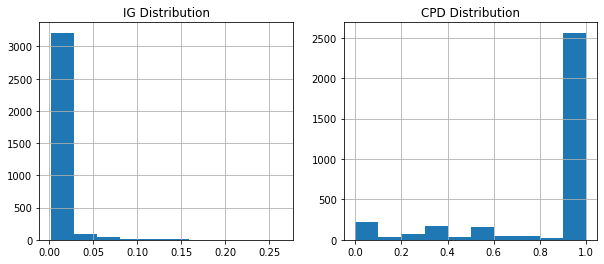

In [35]:
# Distribution for CPD in pre1 & pre2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fitur_pre2.ig_value.hist(ax=axes[0])
fitur_pre2.cpd.hist(ax=axes[1])
axes[0].title.set_text('IG Distribution')
axes[1].title.set_text('CPD Distribution')

In [36]:
# Export features with cpd value
# export_data(fitur_pre2, 'fitur_pre2_cpd')

-- Get subset feature with CPD Parameter Tuning --

In [37]:
# Define list that contains value from 0.1 to 1
frac_val = [i/10 for i in range(1,11)]

# Initiate empty list to take each feature subset selected by cpd tuning
cpd_ft_pre2 = [] # df_pre2

In [38]:
for item in frac_val:
    # CPD Tuning for df_pre2
    cpd_ft_pre2.append(list(fitur_pre2[(fitur_pre2['cpd'] > 0) & (fitur_pre2['cpd'] <= item)].feature))

In [42]:
lenFitur_pre2

[3376, 3038, 2701, 2363, 2026, 1688, 1350, 1013, 675, 338]

In [40]:
[len(x) for x in cpd_ft_pre2]

[7, 83, 113, 287, 396, 475, 526, 586, 603, 3166]

-- Slice feature dataframe based on subset feature by CPD  --

In [69]:
# Slice df_pre1 feature based on subset from both CPD selection
# fitur_pre2_cpd = []

# # Iterate through both cpd parameter tuning and append to list
# for i in range (len(cpd_ft_pre1)):
#     fitur_pre2_cpd.append(fitur_pre2[fitur_pre2.feature.isin(cpd_ft_pre2[i])])

# # Slice df_pre2 feature based on subset from both CPD selection
# fitur_pre2_cpd = []

# # Iterate through both cpd parameter tuning and append to list
# for i in range (len(cpd_ft_pre2)):
#     fitur_pre2_cpd.append(fitur_pre2[fitur_pre2.feature.isin(cpd_f2_pre2[i])])

<strong>Export subset feature dataframe based on CPD tuning parameter</strong>

In [70]:
# Get list of number from 1-10 to append in the end of file name
# idx_export = [int(x*10) for x in frac_val]

# # Iterate to export all feature dataframe based on CPD tuning parameter of df_pre1
# for i in range(0, len(fitur_pre1_cpd1)):
#     # Appended file name
#     tuning_1 = 'fitur_pre1_cpd1_'
#     tuning_2 = 'fitur_pre1_cpd2_'
#     # Export df_pre1 feature dataframe with defined function
#     export_data(fitur_pre1_cpd1[i], tuning_1+str(idx_export[i]))
#     export_data(fitur_pre1_cpd2[i], tuning_2+str(idx_export[i]))
    
# # Iterate to export all feature dataframe based on CPD tuning parameter of df_pre2
# for i in range(0, len(fitur_pre2_cpd1)):
#     # Appended file name
#     tuning_1 = 'fitur_pre2_cpd1_'
#     tuning_2 = 'fitur_pre2_cpd2_'
#     # Export df_pre2 feature dataframe with defined function
#     export_data(fitur_pre2_cpd1[i], tuning_1+str(idx_export[i]))
#     export_data(fitur_pre2_cpd2[i], tuning_2+str(idx_export[i]))

-- Accuracy of cpd subset --

In [71]:
# Get Accuracy of each subset cpd features 
acc_cpd_pre2, prec_cpd_pre2, rec_cpd_pre2, f1score_cpd_pre2 = ([] for i in range(4))
time_arr_cpd, clock_arr_cpd = [], []

for i in range (len(cpd_ft_pre2)):
    features_train = scipy.sparse.csr_matrix(train_pre2_mtx[cpd_ft_pre2[i]].values)
    features_test = scipy.sparse.csr_matrix(test_pre2_mtx[cpd_ft_pre2[i]].values)
    
    mnb = MultinomialNB()
    time_s, clock_s = time.time(), time.clock()
    mnbTfidf = mnb.fit(features_train, y_train_pre2) # training the model
    predictTfidf = mnbTfidf.predict(features_test)
    time_arr_cpd.append(time.time()-time_s)
    clock_arr_cpd.append(time.clock()-clock_s)
    
    acc_cpd_pre2.append(accuracy_score(y_test_pre2,predictTfidf))
    prec_cpd_pre2.append(precision_score(y_test_pre2, predictTfidf))
    rec_cpd_pre2.append(recall_score(y_test_pre2, predictTfidf))
    f1score_cpd_pre2.append(f1_score(y_test_pre2, predictTfidf))

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:

In [77]:
time_arr_ig

[0.002001047134399414,
 0.004984855651855469,
 0.0020003318786621094,
 0.0019989013671875,
 0.0019996166229248047,
 0.002996683120727539,
 0.0030007362365722656,
 0.0019989013671875,
 0.0020003318786621094,
 0.001999378204345703]

In [78]:
# Precision, Recall & f1_score of df_pre2
format_ft_cpd = ['<='+str(round(x*0.1,2)) for x in range(1,11)]
print("Format Jumlah fitur (%):", format_ft_cpd, "\n")
print("Accuracy of df_pre2 (%):", [(round(x*100,2)) for x in acc_cpd_pre2])
print("Precision of df_pre2 (%):", [(round(x*100,2)) for x in prec_cpd_pre2])
print("Recall of df_pre2 (%):", [(round(x*100,2)) for x in rec_cpd_pre2])
print("F1 Score of df_pre2 (%):", [(round(x*100,2)) for x in f1score_cpd_pre2])

Format Jumlah fitur (%): ['<=0.1', '<=0.2', '<=0.3', '<=0.4', '<=0.5', '<=0.6', '<=0.7', '<=0.8', '<=0.9', '<=1.0'] 

Accuracy of df_pre2 (%): [54.31, 61.42, 61.93, 68.53, 70.56, 74.62, 78.68, 84.26, 84.26, 80.2]
Precision of df_pre2 (%): [54.08, 59.15, 60.4, 65.94, 67.65, 70.0, 73.53, 79.53, 79.53, 73.1]
Recall of df_pre2 (%): [100.0, 91.51, 84.91, 85.85, 86.79, 92.45, 94.34, 95.28, 95.28, 100.0]
F1 Score of df_pre2 (%): [70.2, 71.85, 70.59, 74.59, 76.03, 79.67, 82.64, 86.7, 86.7, 84.46]


-- Analyze feature subset with CPD from each dataset for tuning -2--

In [38]:
# subset_cpd_pre1 = import_data(loc, 'df_pre1/Parameter 2/fitur_pre1_cpd2_9')
# print("Banyak fitur cpd-pre1: ", len(cpd_pre1))
loc = 'C:/Users/ASUS/Documents/Learn Data Science/all_dataset/cpd_features/'
subset_cpd_pre2 = import_data(loc, 'df_pre2/Parameter 2/fitur_pre2_cpd2_9')

# Analyze subset features from both feature selection

In [39]:
# Get feature from stemmed data
loc = 'C:/Users/ASUS/Documents/Learn Data Science/all_dataset/tfidf_features/'

stem_pre1 = import_data(loc, 'pre1_stemmed/fitur_pre1_stemmed')
stem_pre2 = import_data(loc, 'pre2_stemmed/fitur_pre2_stemmed')

stemmed_pre1 = [x for x in list(fitur_pre1.feature) if x not in list(stem_pre1.feature)]
stemmed_pre2 = [x for x in list(fitur_pre2.feature) if x not in list(stem_pre2.feature)]

In [44]:
# # Find non-ig-subset 
# non_subset_ig_pre1 = [x for x in list(fitur_pre1.feature) if x not in subset_ig_pre1]
# non_subset_ig_pre2 = [x for x in list(fitur_pre2.feature) if x not in subset_ig_pre2]

# # Find non-cpd-subset 
# non_subset_cpd_pre1 = [x for x in list(fitur_pre1.feature) if x not in list(subset_cpd_pre1.feature)]
# non_subset_cpd_pre2 = [x for x in list(fitur_pre2.feature) if x not in list(subset_cpd_pre2.feature)]

# # Find sw in df_pre1
# sw_subs_ig_pre1 = [x for x in subset_ig_pre1 if x in list(stop_words)]
# sw_nonsubs_ig_pre1 = [x for x in non_subset_ig_pre1 if x in list(stop_words)]

# sw_subs_cpd_pre1 = [x for x in list(subset_cpd_pre1.feature) if x in list(stop_words)]
# sw_nonsubs_cpd_pre1 = [x for x in non_subset_cpd_pre1 if x in list(stop_words)]

# # Find stemmed in df_pre1
# stemmed_subs_ig_pre1 = [x for x in subset_ig_pre1 if x in stemmed_pre1]
# stemmed_nonsubs_ig_pre1 = [x for x in non_subset_ig_pre1 if x in stemmed_pre1]

# stemmed_subs_cpd_pre1 = [x for x in list(subset_cpd_pre1.feature) if x in stemmed_pre1]
# stemmed_nonsubs_cpd_pre1 = [x for x in non_subset_cpd_pre1 if x in stemmed_pre1]

# # Find stemmed in df_pre2
# stemmed_subs_ig_pre2 = [x for x in subset_ig_pre2 if x in stemmed_pre2]
# stemmed_nonsubs_ig_pre2 = [x for x in non_subset_ig_pre2 if x in stemmed_pre2]

# stemmed_subs_cpd_pre2 = [x for x in list(subset_cpd_pre2.feature) if x in stemmed_pre2]
# stemmed_nonsubs_cpd_pre2 = [x for x in non_subset_cpd_pre2 if x in stemmed_pre2]

In [43]:
# # dfPre1
# print('dfpre1\n')
# print("Count of sw in ig-subset df_pre1:",len(sw_subs_ig_pre1))
# print("Count of sw in ig-nonsubset df_pre1:",len(sw_nonsubs_ig_pre1))

# print("Count of sw in cpd-subset df_pre1:",len(sw_subs_cpd_pre1))
# print("Count of sw in cpd-nonsubset df_pre1:",len(sw_nonsubs_cpd_pre1))
# print('\n')
# print("Count of stemmed in ig-subset df_pre1:",len(stemmed_subs_ig_pre1))
# print("Count of stemmed in ig-nonsubset df_pre1:",len(stemmed_nonsubs_ig_pre1))

# print("Count of stemmed in cpd-subset df_pre1:",len(stemmed_subs_cpd_pre1))
# print("Count of stemmed in cpd-nonsubset df_pre1:",len(stemmed_nonsubs_cpd_pre1))

# # dfPre2
# print('\ndfpre2\n')
# print("Count of stemmed in ig-subset df_pre2:",len(stemmed_subs_ig_pre2))
# print("Count of stemmed in ig-nonsubset df_pre2:",len(stemmed_nonsubs_ig_pre2))

# print("Count of stemmed in cpd-subset df_pre2:",len(stemmed_subs_cpd_pre2))
# print("Count of stemmed in cpd-nonsubset df_pre2:",len(stemmed_nonsubs_cpd_pre2))